# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

#Importing libraries and loading data

In [223]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm as cm
from sklearn.model_selection import train_test_split
data = load_breast_cancer()

In [224]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [225]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [226]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [227]:
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

#Analyzing the scatter plots

Firstly plotting the scatter plots with keeping mean_radius fixed on x-axis

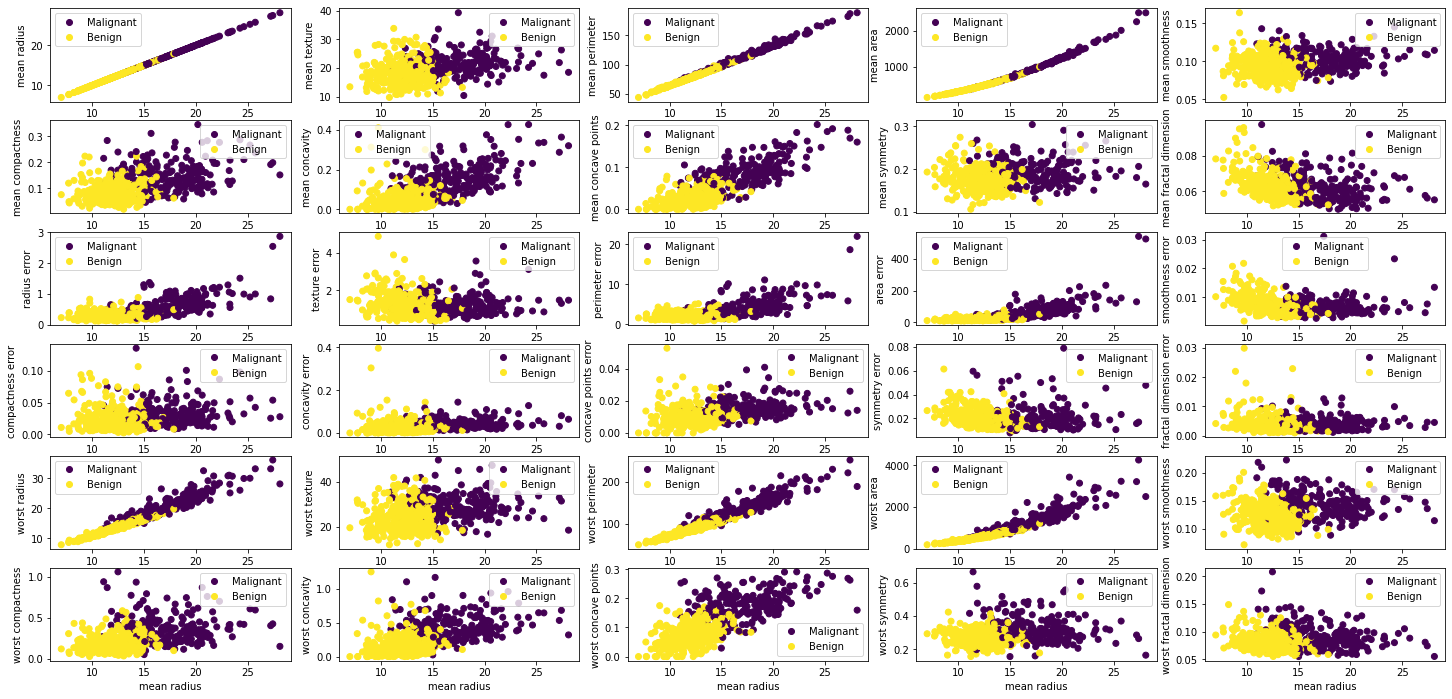

In [228]:
i=0
plt.figure(figsize=(25,12))
for j in range(0,30):
    plt.subplot(6,5,j+1)
    scatter = plt.scatter(X[:,i],X[:,j],c=y)
    plt.legend(handles=scatter.legend_elements()[0],labels = ["Malignant","Benign"])
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])

We can clearly see that mean_radius,mean_perimeter,mean_area are highly correlated and mean_radius,worst_raius,wort_perimeter,wort_area are also correlated.Plotting all 30 features on x-axis is redundant because there will be 30C2 = 435 possible plots, instead using correlation matrix to see the relations.

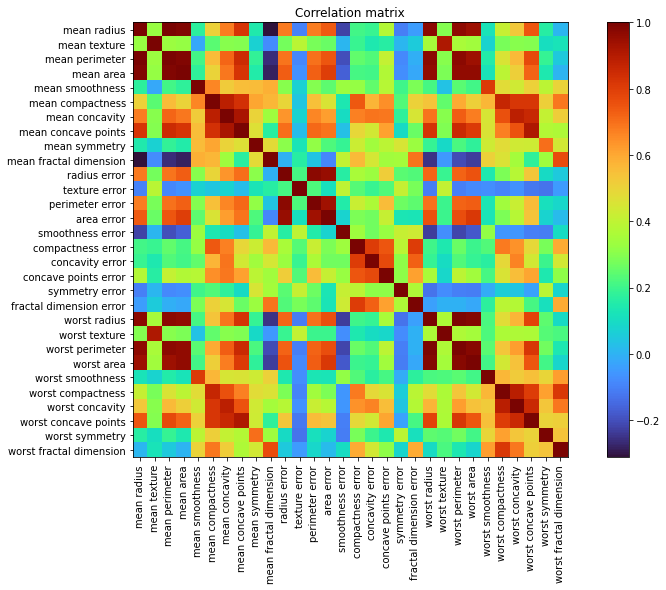

In [229]:
corr_matrix = np.corrcoef(X.T)
figure = plt.figure(figsize = (14,8))
hmap = figure.add_subplot(111)
color = hmap.imshow(corr_matrix, cmap=matplotlib.colormaps['turbo'])
plt.title('Correlation matrix')
hmap.set_xticks(np.arange(len(feature_names)))
hmap.set_yticks(np.arange(len(feature_names)))
hmap.set_xticklabels(feature_names,fontsize=10,rotation=90)
hmap.set_yticklabels(feature_names,fontsize=10)
figure.colorbar(color)

The brown color in the heat map shows us that they are highly correlated features

#Analyzing the Box plots

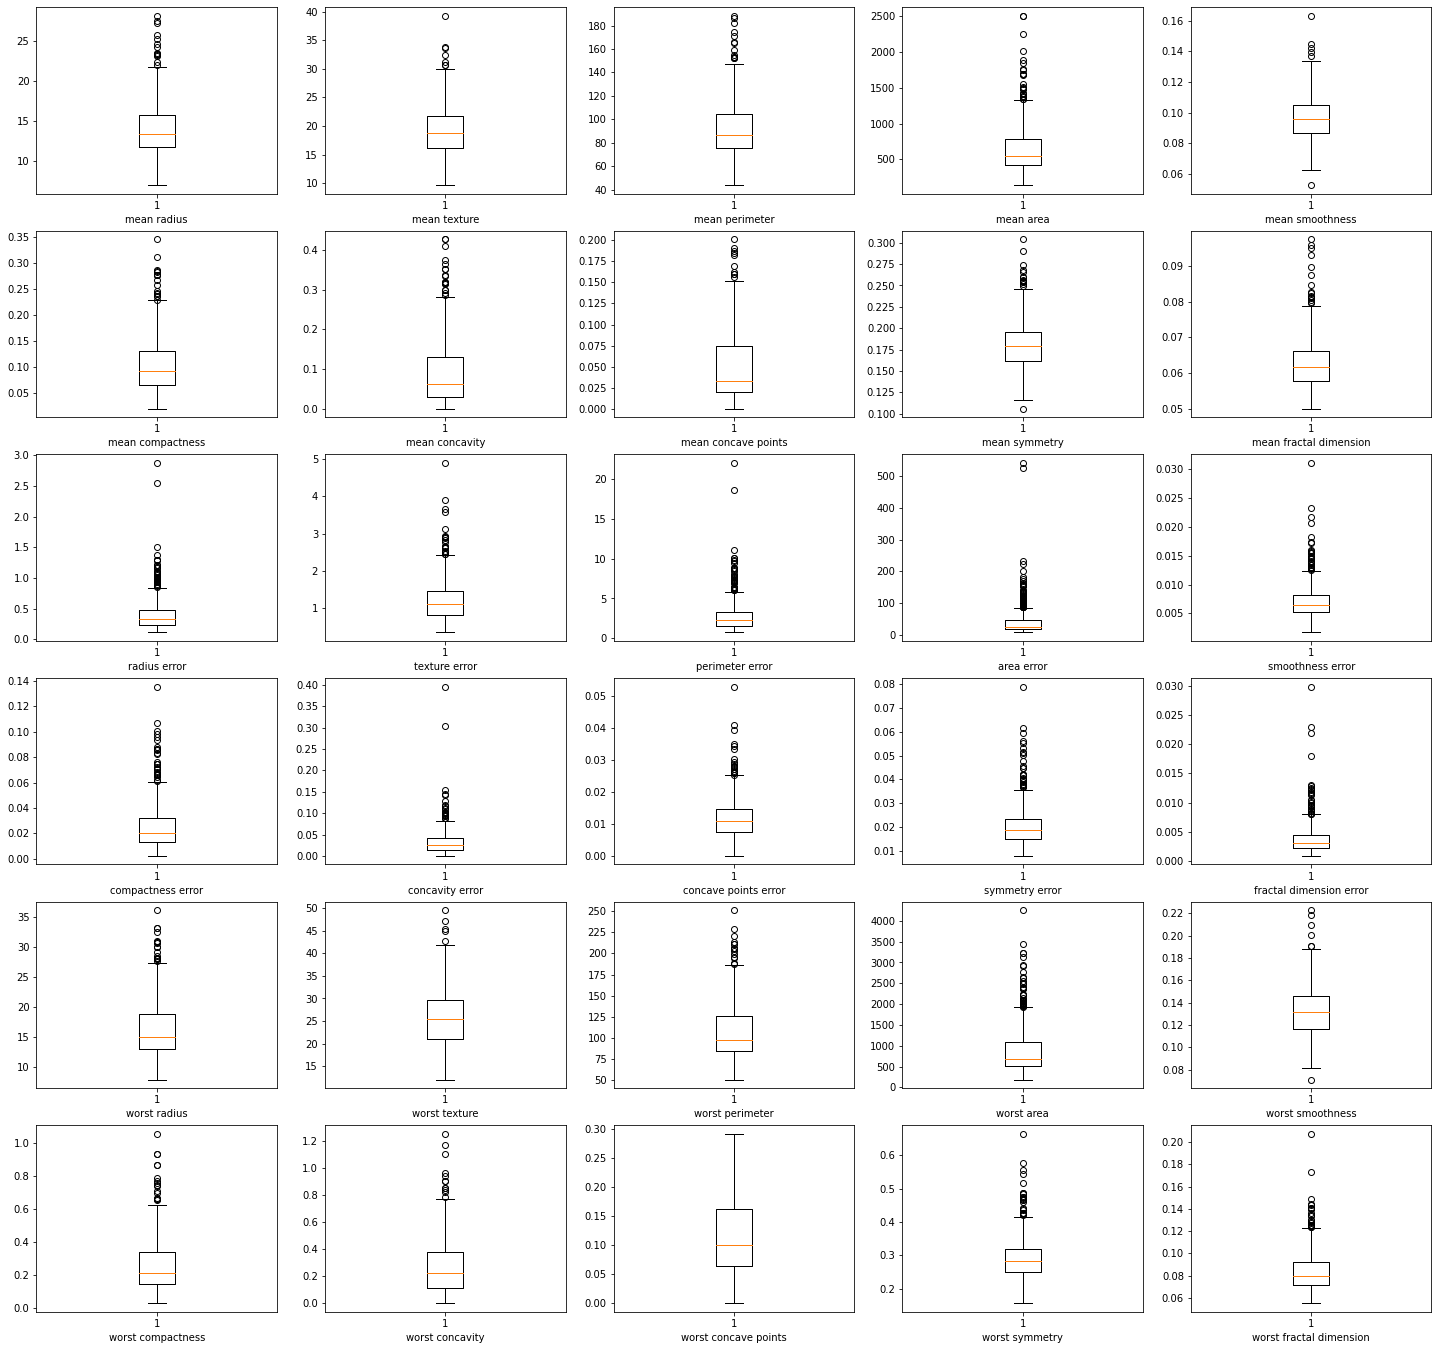

In [230]:
plt.figure(figsize=(25,24))
for j in range(0,30):
    plt.subplot(6,5,j+1)
    plt.boxplot(X[:,j])
    plt.xlabel(feature_names[j])

In some features there are very high number of outliers such as area_error,perimeter_error,etc.They are redundant features in building a classification model.From the plot it is evident that some features are very similar such as mean_perimeter and mean_area.

#Creating Training and Test Datasets

Doing Feature Selection

In [231]:
from sklearn.feature_selection import SelectKBest, chi2
features = SelectKBest(chi2, k=5)
features.fit(X,y)
values = features.get_support()
selected_feature_indices = []
selected_feature_names = []
for i in range(30):
    if values[i]:
        selected_feature_indices.append(i)
        selected_feature_names.append(feature_names[i])

Here k is taken as 5 because in the correlation matrix heat map we can clearly see there are 5 regions in heatmap which are brown color(highly correlated).

In [232]:
X_selected = X[:,selected_feature_indices]

In [233]:
X_selected.shape

(569, 5)

In [234]:
selected_feature_names

['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']

Now splitting the selected data into training and test data

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33, random_state=3)

In [236]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(381, 5) (188, 5) (381,) (188,)


#Decision Tree Classifier 

In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        68
           1       0.94      0.93      0.94       120

    accuracy                           0.92       188
   macro avg       0.91      0.92      0.91       188
weighted avg       0.92      0.92      0.92       188



The accuracy obtained by Decision Tree classifier is approximately 92%

In [247]:
from sklearn.inspection import permutation_importance
dtc_fi = permutation_importance(dtc,X_train,y_train)
print('{0: <15}'.format('Feature name'),'Importance score')
for i in range(5):
    print('{0: <15}'.format(feature_names[i]),dtc_fi['importances_mean'][i])

Feature name    Importance score
mean radius     0.0257217847769029
mean texture    0.1443569553805774
mean perimeter  0.06824146981627299
mean area       0.06824146981627296
mean smoothness 0.26456692913385826


Mean_smoothness has highest feature importance score

#Logistic Regression Model

In [248]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.97      0.97      0.97       120

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



The accuracy obtained by Logistic Regression Model is approximately 96%

In [249]:
lr_fi = permutation_importance(lr,X_train,y_train)
print('{0: <15}'.format('Feature name'),'Importance score')
for i in range(5):
    print('{0: <15}'.format(feature_names[i]),lr_fi['importances_mean'][i])

Feature name    Importance score
mean radius     0.060892388451443534
mean texture    0.10341207349081363
mean perimeter  0.03884514435695539
mean area       0.2204724409448819
mean smoothness 0.3679790026246719


Mean_smoothness has highest feature importance score

#Random Forest Model

In [254]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        68
           1       0.94      0.96      0.95       120

    accuracy                           0.94       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188



The accuracy obtained by Random Forest Model is approximately 95%

In [251]:
print('{0: <15}'.format('Feature name'),'Importance score')
for i in range(5):
    print('{0: <15}'.format(feature_names[i]),rf.feature_importances_[i])

Feature name    Importance score
mean radius     0.11121854813078874
mean texture    0.18294691359524134
mean perimeter  0.06544565537110668
mean area       0.3944871747909326
mean smoothness 0.24590170811193054


Mean_area has highest feature importance score.

#Which model performed better?

Accuracies for Decision Tree Classifier, Logistic Regression Model and Random Forest Model are respectively 92%,96%,95%. Logistic Regression Model and Random Forest Model are very close but Logistic Regression is best among all three models.

#What are the most relevant features in each model?

In both Decision Tree Classifier and Logistic Regression Model the most relevant feature is mean_smoothness. In Random forest model the most relevant feature is mean_area.

#Improving the performance on best performed model by Grid Search

In [243]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty' : ['l2'],'C' : [0.01,0.1,1,10,100,1000]}

grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, scoring = 'accuracy')

grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2']},
             scoring='accuracy')

In [244]:
grid.best_params_


{'C': 1, 'penalty': 'l2'}

In [245]:
y_pred = grid.predict(X_test)
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.97      0.97      0.97       120

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



From the grid search the best accuracy obtained is 96% with parameters c = 1 and l2 regularization.